In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("/Users/soumobratamanna/Documents/AI_ML PROJECTS/car data.csv")

In [3]:
data.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [4]:
data.tail(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
291,brio,2015,5.40,6.10,31427,Petrol,Dealer,Manual,0
292,jazz,2016,6.40,8.40,12000,Petrol,Dealer,Manual,0
293,city,2010,3.25,9.90,38000,Petrol,Dealer,Manual,0
294,amaze,2014,3.75,6.80,33019,Petrol,Dealer,Manual,0
295,city,2015,8.55,13.09,60076,Diesel,Dealer,Manual,0
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.90,5464,Petrol,Dealer,Manual,0


In [5]:
data.shape

(301, 9)

In [6]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
data.info

<bound method DataFrame.info of     Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Manual      0  
1  

In [9]:
#Encoding the fuel type
data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

#Encoding the Seller  type
data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

#Encoding the Transmission type
data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)


In [11]:
#Dividing the dataset between independent and dependent variables 
X = data.drop(['Car_Name','Selling_Price'],axis=1) 
Y = data['Selling_Price'] #Target varibale 

In [12]:
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [13]:
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [14]:
#Creating train test split

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size = 0.3)

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(x_test_scaled)

In [23]:
X_train

,0,1,2,3,4,5,6
0,0.928571,0.009228,0.091765,0.0,1.0,0.0,0.0
1,0.142857,0.369966,0.350588,0.0,0.0,0.0,0.0
2,0.785714,0.098154,0.217440,0.0,0.0,0.0,0.0
3,0.857143,0.352908,0.280358,0.5,0.0,0.0,0.0
4,0.571429,0.335850,0.209412,0.5,0.0,0.0,0.0
...,...,...,...,...,...,...,...
205,0.857143,0.157438,0.145539,0.0,0.0,0.0,0.0
206,0.214286,0.650447,0.665882,0.0,1.0,1.0,1.0
207,0.000000,0.050615,0.595294,0.0,1.0,0.0,0.0
208,0.928571,0.026007,0.162353,0.0,1.0,0.0,0.0


In [24]:
X_test

,0,1,2,3,4,5,6
0,0.800000,0.104248,0.029029,0.0,0.0,1.0,0.0
1,0.666667,0.060468,0.018619,0.0,0.0,0.0,0.0
2,0.800000,0.143910,0.067067,0.0,0.0,0.0,0.0
3,0.533333,0.005061,0.149149,0.0,1.0,0.0,0.0
4,0.933333,0.097204,0.073073,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
86,0.600000,0.007261,0.028028,0.0,1.0,0.0,0.0
87,0.133333,0.142393,0.393746,1.0,0.0,0.0,0.0
88,0.866667,0.039337,0.049049,0.0,0.0,0.0,0.0
89,0.800000,0.005418,0.035035,0.0,1.0,0.0,0.0


In [25]:
#Checking the error rate based on the value of K


In [26]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt

In [31]:
rmse_value = []
for K in range(15):
    K = K + 1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    error = sqrt(mean_squared_error(y_test,predictions)) #calculating rmse
    rmse_value.append(error) 
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 4.157068387989015
RMSE value for k=  2 is: 4.224719315730135
RMSE value for k=  3 is: 4.134104412302536
RMSE value for k=  4 is: 4.174778132882179
RMSE value for k=  5 is: 4.095663345754659
RMSE value for k=  6 is: 4.021800907514262
RMSE value for k=  7 is: 3.931300781597498
RMSE value for k=  8 is: 3.978812067317702
RMSE value for k=  9 is: 3.930665817322442
RMSE value for k=  10 is: 3.965395610988688
RMSE value for k=  11 is: 4.032534874868217
RMSE value for k=  12 is: 4.056191892201529
RMSE value for k=  13 is: 4.110501799919592
RMSE value for k=  14 is: 4.185849507703753
RMSE value for k=  15 is: 4.2122781460258745


<AxesSubplot:>

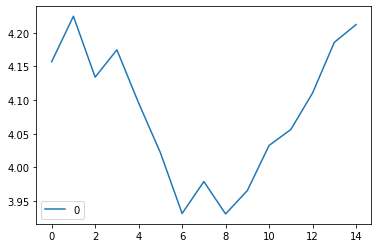

In [33]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_value) #elbow curve 
curve.plot()